<a href="https://colab.research.google.com/github/ClaytonUrbano/analise-de-dados/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('carros.csv')
df.head()
pd.set_option('display.max_rows', None)

In [ ]:
print (df)

          preco manutencao portas pessoas bagageiro seguranca aceitabilidade
0     muitoalto  muitoalto      2       2   pequeno     baixa    inaceitavel
1     muitoalto  muitoalto      2       2   pequeno     media    inaceitavel
2     muitoalto  muitoalto      2       2   pequeno      alta    inaceitavel
3     muitoalto  muitoalto      2       2     medio     baixa    inaceitavel
4     muitoalto  muitoalto      2       2     medio     media    inaceitavel
5     muitoalto  muitoalto      2       2     medio      alta    inaceitavel
6     muitoalto  muitoalto      2       2    grande     baixa    inaceitavel
7     muitoalto  muitoalto      2       2    grande     media    inaceitavel
8     muitoalto  muitoalto      2       2    grande      alta    inaceitavel
9     muitoalto  muitoalto      2       4   pequeno     baixa    inaceitavel
10    muitoalto  muitoalto      2       4   pequeno     media    inaceitavel
11    muitoalto  muitoalto      2       4   pequeno      alta    inaceitavel

In [ ]:
x = df.drop('aceitabilidade', axis=1)
y = df['aceitabilidade']

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=123)

print(f"Tamanho do x_treino: {x_treino.shape}")
print(f"Tamanho do y_treino: {y_teste.shape}")

Tamanho do x_treino: (1209, 6)
Tamanho do y_treino: (519,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the data into training and testing sets
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=123)

# Copy the data to keep the originals intact
x_treino_encoded = x_treino.copy()
x_teste_encoded = x_teste.copy()

# Create a dictionary to store the encoders
label_encoders = {}

# Encode each categorical input column
for coluna in x_treino.columns:
    le = LabelEncoder()
    x_treino_encoded[coluna] = le.fit_transform(x_treino[coluna])
    x_teste_encoded[coluna] = le.transform(x_teste[coluna])  # use the same encoder
    label_encoders[coluna] = le  # save the encoder for possible future use

# Encode the target variable (aceitabilidade)
le_target = LabelEncoder()
y_treino_encoded = le_target.fit_transform(y_treino)
y_teste_encoded = le_target.transform(y_teste)

print(f"Tamanho do x_treino: {x_treino.shape}")
print(f"Tamanho do y_treino: {y_treino_encoded.shape}")

Tamanho do x_treino: (1209, 6)
Tamanho do y_treino: (1209,)


In [ ]:
print(x_treino_encoded.head())


      preco  manutencao  portas  pessoas  bagageiro  seguranca
1468      1           0       2        1          2          2
152       3           0       1        1          0          0
1119      2           2       1        1          1          1
1252      2           1       2        1          2          2
556       0           0       0        1          0          2


In [ ]:
# Visualizar os dados de entrada codificados
print("Exemplo de x_treino codificado:")
print(x_treino_encoded.head())

# Visualizar os dados da variável alvo codificada
print("\nExemplo de y_treino codificado:")
print(y_treino_encoded[:5])



Exemplo de x_treino codificado:
      preco  manutencao  portas  pessoas  bagageiro  seguranca
1468      1           0       2        1          2          2
152       3           0       1        1          0          0
1119      2           2       1        1          1          1
1252      2           1       2        1          2          2
556       0           0       0        1          0          2

Exemplo de y_treino codificado:
[0 2 2 0 0]


DecisionTreeClassifier(random_state=123)

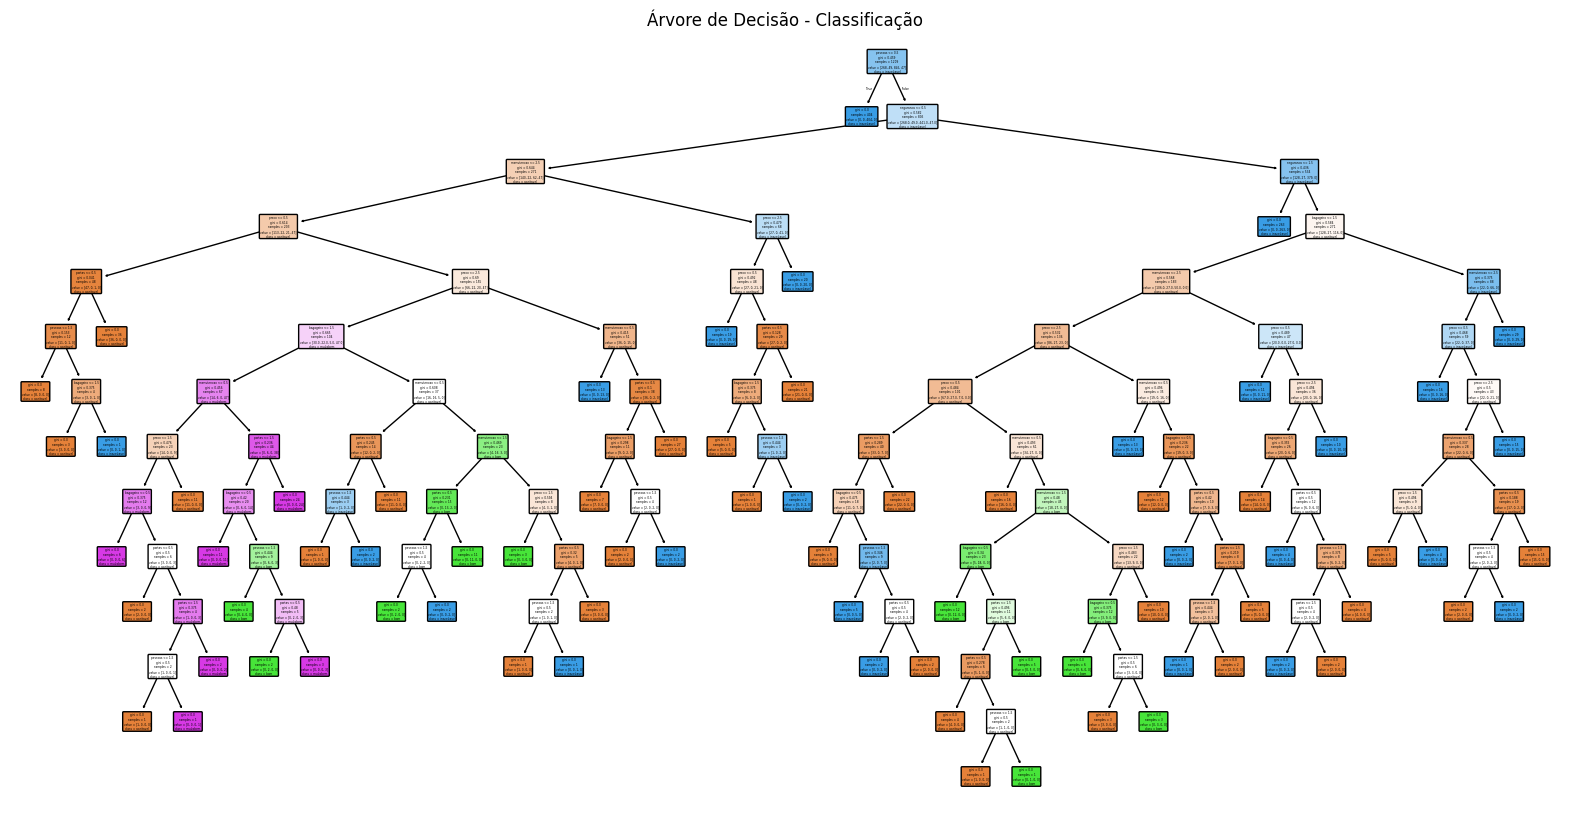

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(modelo,
          feature_names=x_treino_encoded.columns,
          class_names=le_target.classes_,
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão - Classificação")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(x_teste_encoded)

# Calcular a acurácia
acuracia = accuracy_score(y_teste_encoded, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")


Acurácia do modelo: 0.98


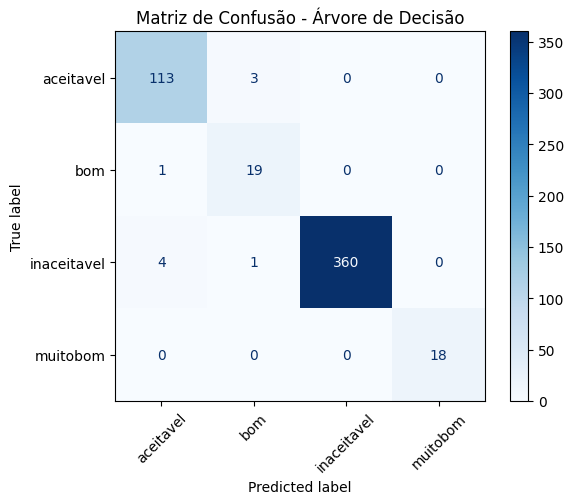

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Criar matriz de confusão
cm = confusion_matrix(y_teste_encoded, y_pred)

# Exibir a matriz com rótulos legíveis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()


In [ ]:
import pandas as pd

# Calcular importância
importancias = modelo.feature_importances_

# Criar DataFrame para visualizar
importancia_df = pd.DataFrame({
    'Variável': x_treino_encoded.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

print("Importância das variáveis na decisão:")
print(importancia_df)



Importância das variáveis na decisão:
     Variável  Importância
5   seguranca     0.244434
0       preco     0.228024
3     pessoas     0.186914
1  manutencao     0.169415
4   bagageiro     0.110357
2      portas     0.060855


In [ ]:
pip install joblib


In [ ]:
import joblib

# Salvar o modelo
joblib.dump(modelo, 'modelo_arvore_decisao.pkl')

# Salvar os encoders
joblib.dump(le_target, 'encoder_target.pkl')
joblib.dump(label_encoders, 'encoders_variaveis.pkl')

print("Modelo e encoders salvos com sucesso!")


Modelo e encoders salvos com sucesso!


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializa o classificador de árvore de decisão
classific = DecisionTreeClassifier()

# Treina o modelo
classific.fit(x_treino_encoded, y_treino_encoded)

DecisionTreeClassifier()

In [ ]:
df.to_csv('dados_com_predicoes.csv', index=False)


In [ ]:
from google.colab import files
files.download('dados_com_predicoes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>